## **BCB546X Python Project**

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### **Functions**

##### The following function utilizes the 'SeqIO.parse()' function of Biopython.
##### In Biopython, 'Seq' objects are the most basic expressions of sequences, containing only a sequence (as a text string) and its corresponding alphabet (DNA, RNA, Protein, etc.)
##### A 'SeqRecord' is an object that contains a 'Seq' object along with an ID tag and other possible attributes (such as name and description).
##### 'SeqIO.parse()' takes a filename and file format as its arguments, and returns a 'SeqRecord' iterator.

##### https://biopython.org/wiki/SeqIO

In [3]:
def get_sequences_from_file(fasta_fn): #(1) Defines the function's name (which will take the name of a fasta file as its argument).
    sequence_data_dict = {} #(2) Initializes a dictionary named 'sequence_data_dict'.
    for record in SeqIO.parse(fasta_fn, "fasta"):  #(3) Initializes a for-loop over the 'SeqRecord' iterator extracted from the specified fasta file (1).
        description_list = record.description.split() #(4) Extracts the 'description' attribute from each 'SeqRecord' and splits it into a list of individual words (named 'description_list').
        species_name = description_list[1] + " " + description_list[2]  #(5) Takes the second and third items (words) from 'description_list' separated by a space, and names this string 'species_name'.
        sequence_data_dict[species_name] = record.seq  #(6) Creates an entry in the dictionary with 'species_name' from (5) as the key and the sequence portion of the 'SeqRecord' as the value.
    return(sequence_data_dict)  #(7) Returns the above-generated dictionary as the output of this new function.

In [4]:
def translate_function(nucseq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq = ""
    for x,y,z in zip(nucseq[0::3],nucseq[1::3],nucseq[2::3]):
        codon = x + y + z
        if codon in ["TAA","TAG","AGA","AGG"]:
            break
        else:
            aa_seq += (mito_table.forward_table[codon])
    return(aa_seq)

In [5]:
from Bio.Seq import Seq  # Unnecessary
def alt_translator(nucseq):
    seq_object = nucseq.translate(table="Vertebrate Mitochondrial", to_stop=True)  # https://biopython.org/wiki/Seq
    aa_seq = ""
    for n in seq_object:
        aa_seq += n
    return(aa_seq)

In [6]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):  # https://biopython.org/wiki/ProtParam
    return(ProteinAnalysis(aa_seq).molecular_weight())

In [7]:
def gc_content(nucseq):
    gc = 0
    nuc = 0
    for n in nucseq:
        if n in ['G','C']:
            gc += 1
        if n in ['A','T','C','G']:
            nuc += 1
    gc_ratio = gc / nuc
    return(gc_ratio)

### **Main**

In [178]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")

In [179]:
bears_df = pd.read_csv("bears_mass.csv")

In [180]:
bears_df['Molecular_Weight'] = "NaN"

In [181]:
bears_df['GC_Content'] = "NaN"

In [182]:
bears_df

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


In [183]:
species_list = list(bears_df.species)

In [191]:
for key, value in cytb_seqs.items():
    aa_seq = alt_translator(value)
    bears_df.loc[bears_df.species == key, 'Molecular_Weight'] = compute_molecular_weight(aa_seq)
    bears_df.loc[bears_df.species == key, 'GC_Content'] = gc_content(value)
print(bears_df)

                  species     mass Molecular_Weight GC_Content
0          Ursus spelaeus  550.800          42458.8   0.437719
1            Ursus arctos  203.500          42414.7   0.437719
2        Ursus thibetanus   99.714          42306.7    0.45614
3        Melursus ursinus  100.030            42552   0.451754
4        Ursus americanus  110.560          42427.7   0.439474
5     Helarctos malayanus   47.020          42560.9   0.442982
6  Ailuropoda melanoleuca  118.200          42702.2   0.407895
7      Tremarctos ornatus  140.700          42384.8    0.44386
8         Ursus maritimus  425.100          42454.8   0.442982


In [192]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
## *Q2* What else is interesting about this species?

## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"

## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)


In [193]:
species_mass = bears_df.set_index('species').mass

Text(0.5,0,'Species')

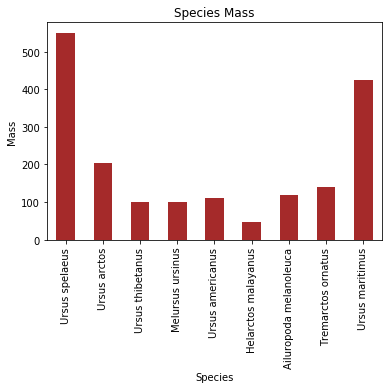

In [194]:
mass_plot = species_mass.plot(kind='bar',title='Species Mass', color='brown')
mass_plot.set_ylabel("Mass")
mass_plot.set_xlabel("Species")
# Largest species is Ursus spelaeus

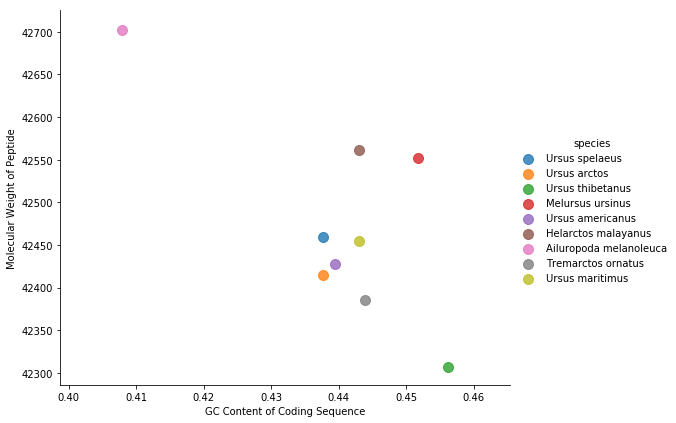

In [232]:
mw_gc = sns.lmplot('GC_Content', 'Molecular_Weight', data=bears_df, fit_reg=False, height=6, aspect=1.25, scatter_kws={"s": 100}, hue='species')
mw_gc.set_axis_labels('GC Content of Coding Sequence', 'Molecular Weight of Peptide')

In [216]:
bears_df.to_csv('bears_mass_cytb.csv',index_label=False)

In [250]:
import numpy as np
from scipy import stats
a = np.array([[1, 3, 4, 2, 2, 7],
              [5, 2, 2, 1, 4, 1],
              [3, 3, 2, 2, 1, 1]])

mut_site = []
for i in range(len(cytb_seqs[species_list[0]])):
    for j in range(9):
        count = 0
        seq_j = cytb_seqs[species_list[j]]
        if cytb_seqs[species_list[0]][i] != seq_j[i]:
            count += 1
    if count > 0:
        mut_site.append(i) 
print(mut_site)

[23, 59, 62, 110, 116, 119, 134, 155, 164, 185, 195, 203, 227, 243, 254, 266, 278, 305, 360, 368, 383, 392, 428, 437, 443, 479, 497, 518, 539, 551, 567, 587, 596, 659, 662, 683, 698, 707, 713, 714, 720, 722, 740, 761, 769, 779, 785, 788, 847, 848, 857, 884, 905, 906, 912, 926, 956, 974, 980, 1055, 1084, 1136]


In [323]:
nucdic = {'A':1, 'C':2, 'G':3, 'T':4}
a = []
for i in range(9):
    numseq = []
    for n in range(len(cytb_seqs[species_list[i]])):
        numseq.insert(n, nucdic.get(cytb_seqs[species_list[i]][n]))
    a.insert(i, numseq)

In [371]:
b = []
for i in range(9):
    b.insert(i, [str(cytb_seqs[species_list[i]])])
print(b)

[['ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTTATTGACCTCCCAACACCATCAAACATCTCAGCATGATGAAACTTTGGATCCCTCCTCGGAGTATGCTTAATTCTACAGATCCTAACAGGCCTGTTTCTAGCTATACACTACACATCAGACACAACCACAGCCTTTTCATCAATCACCCATATTTGCCGAGACGTTCACTACGGTTGAGTTATCCGATATATACATGCAAACGGAGCCTCCATATTCTTTATCTGTCTATTCATGCACGTAGGACGGGGCCTATACTATGGCTCATACCTATTCTCAGAAACATGAAACATTGGCATTATTCTCCTACTTACAGTCATAGCCACCGCATTCATAGGATATGTCCTACCCTGAGGCCAAATGTCCTTCTGAGGAGCAACTGTCATTACCAACCTACTATCGGCCATTCCCTATATCGGAACGGACCTAGTAGAATGAATCTGAGGAGGCTTTTCCGTAGATAAGGCAACTCTAACACGATTCTTTGCCTTCCACTTTATCCTCCCGTTCATCATCTTAGCACTAGCAGCAGTCCATCTATTGTTTCTACACGAAACAGGATCCAACAACCCCTCTGGAATCCCATCTGACTCAGACAAAATCCCATTTCACCCATACTATACAATTAAGGACATTCTAGGCGCCCTGCTTCTCACTCTAGCTTTAGCAGCTCTAGTCCTATTCTCGCCTGACTTACTAGGAGACCCTGACAACTATACCCCCGCAAACCCACTGAGTACCCCACCCCACATCAAACCCGAGTGGTACTTTCTATTTGCCTACGCTATCCTACGATTTATCCCTAACAAACTAGGAGGAGTACTAGCACTAATCTTCTCCATTCTAATCCTAGCTATCATTTCTCTTCTACACACATCCAAACAACGAGGAATGATATTCCGGCCTCTAAGCCAATGCCTATTCTGACTCCTAGTAGCAGACCTAC

In [324]:
np.asarray(a)

array([[1, 4, 3, ..., 1, 3, 1],
       [1, 4, 3, ..., 1, 3, 1],
       [1, 4, 3, ..., 1, 3, 1],
       ...,
       [1, 4, 3, ..., 1, 3, 1],
       [1, 4, 3, ..., 1, 3, 1],
       [1, 4, 3, ..., 1, 3, 1]])

In [355]:
m.count[0,1]

9

In [599]:
from scipy import stats
m = stats.mode(a)
snp_index = []
snp_mode = []
snp_norm = []
for i in range(len(cytb_seqs[species_list[0]])):
    if m.count[0,i] != 9:
        snp_index.append(i)
print(snp_index)        

[4, 20, 23, 27, 31, 32, 38, 41, 46, 51, 53, 59, 62, 66, 71, 77, 80, 83, 84, 86, 92, 98, 101, 107, 108, 110, 113, 114, 116, 119, 120, 122, 123, 125, 126, 128, 131, 134, 135, 137, 140, 144, 146, 149, 152, 155, 158, 164, 168, 173, 174, 176, 177, 179, 185, 188, 194, 195, 198, 200, 203, 206, 209, 215, 218, 219, 221, 224, 227, 231, 233, 242, 243, 248, 251, 254, 257, 260, 263, 266, 269, 272, 278, 279, 281, 284, 287, 293, 296, 299, 302, 303, 305, 308, 311, 314, 317, 324, 326, 327, 329, 332, 338, 341, 343, 344, 347, 350, 353, 360, 362, 366, 368, 377, 383, 386, 389, 392, 395, 398, 404, 413, 416, 419, 428, 431, 434, 437, 443, 446, 447, 452, 455, 458, 464, 467, 471, 473, 474, 479, 485, 488, 489, 497, 500, 503, 506, 509, 510, 512, 515, 518, 521, 524, 527, 533, 536, 539, 542, 551, 552, 554, 557, 560, 563, 566, 567, 568, 569, 570, 575, 576, 577, 578, 579, 580, 581, 584, 587, 593, 596, 599, 602, 611, 614, 617, 620, 626, 632, 633, 638, 639, 642, 644, 656, 659, 660, 662, 665, 668, 669, 680, 683, 684, 68

In [600]:
for i in snp_index:
    if m.count[0,i] < 5:
        snp_mode.append('--')
    else:
        snp_mode.append(m.mode[0,i])
print(snp_mode)

[2, 2, 2, 4, 2, 4, 2, 2, 1, 2, 4, 2, 2, 1, 1, 2, 2, 1, 3, 1, 1, 4, 1, 2, 2, 2, 1, 3, 1, 2, 4, 1, 1, '--', 2, 1, 3, 4, 2, 1, 1, 2, 1, 4, 1, 2, 1, 4, 4, 2, 1, 1, 1, 2, 2, 4, 1, 3, 1, 2, 4, 4, 2, 2, 4, 2, 2, 2, 1, '--', 4, 4, 1, 4, 1, 2, 1, 2, 2, '--', 2, 4, 2, 2, 1, 2, 3, 1, 1, 3, 2, 2, 3, 2, 4, 2, 1, 4, 2, 4, 1, 1, 1, 2, 4, 4, 2, 4, 4, 4, 4, 3, 4, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 1, 4, 2, 2, 4, '--', 2, 3, 2, 4, 4, 4, 1, 3, 3, 1, 1, 1, 1, 3, 2, 4, 2, 1, 3, 4, 3, 3, 4, 1, 1, 2, 4, 4, 2, 2, 2, 4, 1, 2, 2, 2, 4, 4, 1, 3, 1, 3, 2, 1, 3, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 4, 2, 2, 4, 3, 4, 1, 1, 4, 2, 2, 1, 2, 4, 1, 2, 1, 4, 4, 2, 2, 2, 1, 2, 2, 2, 1, 4, 2, 1, 3, 2, 2, 1, 3, 2, 1, 2, 1, 4, 2, 2, 3, 2, 4, 1, 2, 1, 2, 4, 2, 4, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 4, 2, 2, 4, 2, 2, 1, 1, 2, 2, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 3, 4, 1, 2, 4, 2, '--', 4, 2, 1, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 4, 1, 2, 4, 2, 1, 1, 4, 1, 1, 1, 2, 4, 2, 4, 2, 1, 4, 4, 4, 4, 2, 1, 1, 

In [601]:
snp_norm = [m.mode[0,i] for i in snp_index]

In [602]:
danger_mode = []
for i in range(len(cytb_seqs[species_list[0]])):
    if m.count[0,i] < 5:
        danger_mode.append(i)
print(danger_mode)

[125, 231, 266, 446, 914]


In [604]:
dangers = []
for i in range(5):
    seq = []
    for j in range(9):
        seq.append(cytb_seqs[species_list[j]][danger_mode[i]])
    dangers.append(seq)
pd.DataFrame(dangers)

,0,1,2,3,4,5,6,7,8
0,T,T,C,T,A,C,C,C,T
1,G,G,A,A,A,A,T,G,G
2,A,C,G,A,G,G,A,A,G
3,A,A,C,G,C,C,A,G,A
4,T,T,C,C,C,C,A,T,T


In [605]:
revdic = {1:'A', 2:'C', 3:'G', 4:'T', '--':'--'}
q = []
modes = []
for i in range(len(snp_index)):
    modes.append(revdic[snp_mode[i]])
for j in range(9):
    snp_i = []
    for i in range(len(snp_index)):
        snp_i.append(cytb_seqs[species_list[j]][snp_index[i]])
    q.append(snp_i)
q.append(modes)
print(q)

[['C', 'C', 'T', 'T', 'C', 'T', 'C', 'C', 'A', 'T', 'T', 'C', 'C', 'A', 'A', 'C', 'C', 'A', 'G', 'A', 'A', 'T', 'A', 'C', 'C', 'C', 'A', 'G', 'A', 'C', 'T', 'A', 'A', 'T', 'C', 'A', 'G', 'C', 'C', 'A', 'A', 'C', 'G', 'T', 'A', 'T', 'A', 'C', 'T', 'C', 'A', 'A', 'A', 'C', 'C', 'T', 'A', 'A', 'A', 'C', 'T', 'T', 'C', 'C', 'T', 'C', 'C', 'C', 'T', 'G', 'T', 'T', 'A', 'T', 'A', 'C', 'A', 'C', 'C', 'A', 'C', 'T', 'T', 'C', 'A', 'C', 'G', 'A', 'A', 'G', 'C', 'C', 'A', 'C', 'T', 'C', 'A', 'T', 'C', 'T', 'A', 'A', 'A', 'C', 'T', 'T', 'C', 'T', 'T', 'C', 'T', 'G', 'C', 'C', 'C', 'A', 'A', 'T', 'C', 'A', 'A', 'G', 'C', 'C', 'A', 'T', 'C', 'T', 'C', 'A', 'C', 'G', 'C', 'T', 'T', 'C', 'A', 'G', 'G', 'A', 'A', 'A', 'A', 'A', 'C', 'T', 'C', 'A', 'G', 'T', 'G', 'A', 'T', 'A', 'A', 'C', 'T', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'C', 'C', 'T', 'T', 'A', 'G', 'A', 'G', 'C', 'A', 'G', 'C', 'A', 'C', 'T', 'G', 'T', 'A', 'C', 'A', 'C', 'C', 'C', 'T', 'C', 'C', 'T', 'G', 'T', 'A', 'A', 'T', 'C', 'C', 'A', 'C'

In [606]:
qpd = pd.DataFrame(q)

In [607]:
df2 = pd.DataFrame(['(Mode)'])

In [608]:
df3 = bears_df.species.append(df2, ignore_index=True)

In [609]:
df3

,0
0,Ursus spelaeus
1,Ursus arctos
2,Ursus thibetanus
3,Melursus ursinus
4,Ursus americanus
5,Helarctos malayanus
6,Ailuropoda melanoleuca
7,Tremarctos ornatus
8,Ursus maritimus
9,(Mode)


In [610]:
qpdc = qpd.set_index(df3.iloc[0:10,0])

In [611]:
qpdc.columns = snp_index

In [612]:
qpdc.index.name = ''

In [613]:
qpdc

,4,20,23,27,31,32,38,41,46,51,...,1107,1109,1112,1118,1121,1123,1124,1129,1133,1136
,,,,,,,,,,,,,,,,,,,,,
Ursus spelaeus,C,C,T,T,C,T,C,C,A,T,...,G,A,T,A,C,A,C,T,G,A
Ursus arctos,C,C,C,T,C,T,C,C,A,C,...,G,A,T,A,T,A,C,T,G,G
Ursus thibetanus,C,C,T,T,C,C,C,C,A,C,...,G,A,C,A,C,A,C,C,A,A
Melursus ursinus,C,C,C,T,C,T,C,T,A,C,...,G,A,C,A,T,A,T,C,G,A
Ursus americanus,C,C,C,T,C,T,C,C,A,C,...,G,G,C,A,T,A,C,C,A,A
Helarctos malayanus,C,C,C,T,C,T,C,T,A,C,...,G,A,T,A,T,A,C,C,A,A
Ailuropoda melanoleuca,T,T,T,T,T,T,T,C,A,T,...,A,C,T,G,T,G,C,C,A,A
Tremarctos ornatus,C,T,C,C,C,T,C,C,G,T,...,G,A,C,A,T,A,C,C,G,A
Ursus maritimus,C,C,C,T,C,T,C,C,A,T,...,G,A,T,A,C,A,C,T,G,G


In [217]:
bears_check = pd.read_csv('bears_mass_cytb.csv')

In [218]:
bears_df

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,42458.8,0.437719
1,Ursus arctos,203.500,42414.7,0.437719
2,Ursus thibetanus,99.714,42306.7,0.45614
3,Melursus ursinus,100.030,42552,0.451754
4,Ursus americanus,110.560,42427.7,0.439474
5,Helarctos malayanus,47.020,42560.9,0.442982
6,Ailuropoda melanoleuca,118.200,42702.2,0.407895
7,Tremarctos ornatus,140.700,42384.8,0.44386
8,Ursus maritimus,425.100,42454.8,0.442982


In [219]:
bears_check

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,42458.7992,0.437719
1,Ursus arctos,203.500,42414.7435,0.437719
2,Ursus thibetanus,99.714,42306.6735,0.456140
3,Melursus ursinus,100.030,42551.9900,0.451754
4,Ursus americanus,110.560,42427.7439,0.439474
5,Helarctos malayanus,47.020,42560.8910,0.442982
6,Ailuropoda melanoleuca,118.200,42702.1845,0.407895
7,Tremarctos ornatus,140.700,42384.8266,0.443860
8,Ursus maritimus,425.100,42454.7873,0.442982


In [ ]:
type(cytb_seqs[species_list[0]])

In [ ]:
cytb_seqs[species_list[0]]

In [ ]:
print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])

In [34]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

In [35]:
dir(mito_table)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'back_table',
 'forward_table',
 'id',
 'names',
 'nucleotide_alphabet',
 'protein_alphabet',
 'start_codons',
 'stop_codons']

In [ ]:
mito_table.stop_codons

In [ ]:
def translate_function(nucseq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq = ""
    for x,y,z in zip(nucseq[0::3],nucseq[1::3],nucseq[2::3]):
        codon = x + y + z
        if codon in mito_table.stop_codons:  #http://biopython.org/DIST/docs/tutorial/Tutorial.html Section 3.10
            break
        else:
            aa_seq += (mito_table.forward_table[codon])
    return(aa_seq)

In [ ]:
alt_translator(cytb_seqs[species_list[0]])

In [ ]:
translate_function(cytb_seqs[species_list[0]])

In [ ]:
from Bio.SeqUtils import molecular_weight
molecular_weight(translate_function(cytb_seqs[species_list[0]]), seq_type='protein', double_stranded=False, circular=False, monoisotopic=False)

In [131]:
from Bio.SeqUtils import GC
GC(cytb_seqs[species_list[0]])

43.771929824561404

In [ ]:
for x in range(9):
    print(len(translate_function(cytb_seqs[species_list[x]])))

In [ ]:
compute_molecular_weight(translate_function(cytb_seqs[species_list[0]]))

In [ ]:
gc_content(cytb_seqs[species_list[0]])

In [ ]:
for x in range(9):
    print(gc_content(cytb_seqs[species_list[x]]))